# Importing the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('max_colwidth', 1000)

# Reading the data.

In [2]:
os.chdir(r'E:\Flask tutorial\Data')

df = pd.read_csv('adult.csv', na_values=['?'])
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


### Checking for null values.
- There are 3 columns having NaN values.

In [3]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [4]:
df['workclass'].value_counts()

Private             33906
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64

In [5]:
for ii in (df['occupation'].value_counts().index):
    print(ii)

Prof-specialty
Craft-repair
Exec-managerial
Adm-clerical
Sales
Other-service
Machine-op-inspct
Transport-moving
Handlers-cleaners
Farming-fishing
Tech-support
Protective-serv
Priv-house-serv
Armed-Forces


### Filling the NA values with the values having maximum count.

In [7]:
get_max_value_of_attribute = lambda attribute: df[attribute].value_counts().index[0]

# Filling the NaN values for the attributes: workclass, occupation and native-country.

df['workclass'].fillna(get_max_value_of_attribute('workclass'), inplace = True)
df['occupation'].fillna(get_max_value_of_attribute('occupation'), inplace = True)
df['native-country'].fillna(get_max_value_of_attribute('native-country'), inplace = True)

In [8]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

# Exploring the data.

### Deleteing the unnecessary columns
- to_delete = ['educational-num', 'relationship', 'fnlwgt']

In [9]:
to_delete = ['educational-num', 'relationship', 'fnlwgt']
df.drop(columns = to_delete, inplace = True)

### Age.

In [10]:
df['age'].describe()

count    48842.000000
mean        38.643585
std         13.710510
min         17.000000
25%         28.000000
50%         37.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:xlabel='age', ylabel='Count'>

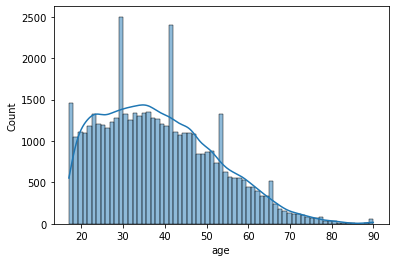

In [11]:
sns.histplot(df.age, kde=True)

### Workclass.
- ['Self-emp-not-inc','Self-emp-inc'] come  under 'self_employed'.
-  ['Local-gov','State-gov','Federal-gov'] come under 'govt_employees'.

In [12]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

df['workclass'].replace(to_replace = self_employed, value = 'self_employed', inplace=True)
df['workclass'].replace(to_replace = govt_employees, value = 'govt_employees', inplace=True)

In [13]:
df['workclass'].value_counts()

Private           36705
govt_employees     6549
self_employed      5557
Without-pay          21
Never-worked         10
Name: workclass, dtype: int64

### Education.
- ['HS-grad','11th','10th','9th','12th'] come under 'HS-grad'.
- ['1st-4th','5th-6th','7th-8th'] come under 'elementary_school'. 

In [14]:
df['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', 'Doctorate',
       '5th-6th', 'Assoc-voc', '9th', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [15]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

df['education'].replace(to_replace = hs_grad, value = 'HS-grad', inplace = True)
df['education'].replace(to_replace = elementary, value = 'elementary_school', inplace = True)

df['education'].value_counts()

HS-grad              20398
Some-college         10878
Bachelors             8025
Masters               2657
Assoc-voc             2061
elementary_school     1711
Assoc-acdm            1601
Prof-school            834
Doctorate              594
Preschool               83
Name: education, dtype: int64

### Marital-status.
- ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse'] come under 'Married'.
- ['Separated','Divorced'] come under 'Separated'.

In [16]:
df['marital-status'].value_counts()

Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64

In [17]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

df['marital-status'].replace(to_replace = married, value = 'Married', inplace = True)
df['marital-status'].replace(to_replace = separated, value = 'Separated', inplace = True)

df['marital-status'].value_counts()

Married          23044
Never-married    16117
Separated         8163
Widowed           1518
Name: marital-status, dtype: int64

### capital-gain.
- Deleting the rows where df['capital-gain'] == 99999.

In [18]:
print("Number of observation before removing:",df.shape)
index_gain = df[df['capital-gain'] == 99999].index

df.drop(labels = index_gain, axis = 0, inplace = True)
print("Number of observation after removing:", df.shape)

Number of observation before removing: (48842, 12)
Number of observation after removing: (48598, 12)


In [19]:
for race in df['gender'].unique():
    print(f'''<option value="{race}">{race}</option>''')

<option value="Male">Male</option>
<option value="Female">Female</option>


## Separating the attributes into numerical and categorical.

In [20]:
numerical_attributes = ['age', 'capital-gain', 'capital-loss', 'hours-per-week']
categorical_attributes = ['workclass', 'education', 'marital-status', 'occupation', 'race', 'gender', 'income']

# Pipeline.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.base import TransformerMixin

### Transforming the numerical columns using MinMaxScaler.


In [22]:
class DataFrameSelector(TransformerMixin):
    '''
    Returns the subset of the dataframe with categorical/numerical attributes.
    '''
    
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
class convertToDataframe(TransformerMixin):
    '''
    Converts the scaled numerical data into a DataFrame with the columns specified under numerical_attributes.
    '''
    
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = numerical_attributes 
        return df

In [23]:
pipeline_numerical = Pipeline([
    ('selector', DataFrameSelector(numerical_attributes)),
    ('scaler', MinMaxScaler()),
    ('dataframe', convertToDataframe())
])

numerical_data_transformed = pipeline_numerical.fit_transform(df)

In [24]:
numerical_data_transformed.head(3)

,age,capital-gain,capital-loss,hours-per-week
0,0.109589,0.0,0.0,0.397959
1,0.287671,0.0,0.0,0.500000
2,0.150685,0.0,0.0,0.397959


In [51]:
import joblib
scaler = MinMaxScaler()
scaler.fit(df[numerical_attributes])
transformed = scaler.transform(df[numerical_attributes])

joblib.dump(scaler, 'minmax_scaler.gz')

['minmax_scaler.gz']

### Getting dummies for categorical attributes.

In [25]:
class DataFrameSelector(TransformerMixin):
    '''
    Returns the subset of the dataframe with categorical/numerical attributes.
    '''
    
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
class dummies(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df_new = pd.get_dummies(X, drop_first=True)
        return df_new

In [26]:
# Creating a pipeline.
pipeline_categorical = Pipeline([('selector', DataFrameSelector(categorical_attributes)), 
                                 ('dummies', dummies())])
categorical_data_transformed = pipeline_categorical.fit_transform(df)
categorical_data_transformed.head(3)

,workclass_Private,workclass_Without-pay,workclass_govt_employees,workclass_self_employed,education_Assoc-voc,education_Bachelors,education_Doctorate,education_HS-grad,education_Masters,education_Preschool,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1,1


In [27]:
num_rows = categorical_data_transformed.shape[0]
numerical_data_transformed['id'] = np.arange(0, num_rows)
categorical_data_transformed['id'] = np.arange(0, num_rows)

In [28]:
final_df = pd.merge(numerical_data_transformed, categorical_data_transformed, how = 'inner', on = 'id')

print("Shape of the resulting dataframe: ", final_df.shape)

final_df.head(3)

Shape of the resulting dataframe:  (48598, 40)


,age,capital-gain,capital-loss,hours-per-week,id,workclass_Private,workclass_Without-pay,workclass_govt_employees,workclass_self_employed,education_Assoc-voc,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male,income_>50K
0,0.109589,0.0,0.0,0.397959,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,0.287671,0.0,0.0,0.500000,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
2,0.150685,0.0,0.0,0.397959,2,0,0,1,0,0,...,1,0,0,0,0,0,0,1,1,1


In [84]:
df_input

,age,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Without-pay,workclass_govt_employees,workclass_self_employed,education_Assoc-voc,education_Bachelors,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,23,1523,230,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Creating X and Y variables.

In [29]:
X = final_df.drop(['id', 'income_>50K'], axis = 1)
Y = final_df['income_>50K']

In [44]:
X.head()

,age,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Without-pay,workclass_govt_employees,workclass_self_employed,education_Assoc-voc,education_Bachelors,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,0.109589,0.000000,0.0,0.397959,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,0.287671,0.000000,0.0,0.500000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
2,0.150685,0.000000,0.0,0.397959,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,1
3,0.369863,0.186105,0.0,0.397959,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,0.013699,0.000000,0.0,0.295918,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0


#### Checking for class imbalance problem.

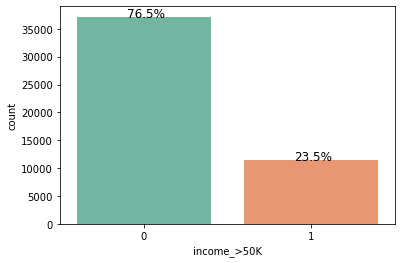

In [30]:
def without_hue(plot, feature):
    '''
    Displays the percentage on top of the bars.
    '''
    
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.1
        y = p.get_y() + p.get_height()
        ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
# Distribution of the target variable.
ax = sns.countplot(Y, palette = 'Set2')
without_hue(ax, Y)

### Under-Sampling.
    - !conda install -c conda-forge imbalanced-learn
    - !pip install delayed
    - Restart the kernel.

In [31]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 100, replacement=True)    # fit predictor and target variable
X_rus, Y_rus = rus.fit_resample(X, Y)

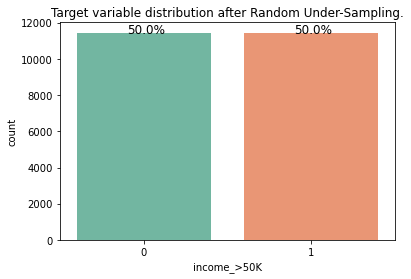

In [32]:
# Distribution of the target variable after under-sampling.
ax = sns.countplot(Y_rus, palette = 'Set2')
plt.title('Target variable distribution after Random Under-Sampling.')
without_hue(ax, Y_rus)

### Train - test split.

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_rus, Y_rus, random_state = 100, test_size = 0.20)

print('X-train : ', x_train.shape)
print('Y-train : ', y_train.shape)
print()
print('X-test : ', x_test.shape)
print('Y-test : ', y_test.shape)

X-train :  (18308, 38)
Y-train :  (18308,)

X-test :  (4578, 38)
Y-test :  (4578,)


# Model Creation using Logistic Regression.

In [34]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import GridSearchCV

In [35]:
param_grid = {'C': [1/100, 1/10, 1.0, 0.1, .2, .3],
              'penalty': ['l1', 'l2'],
              'class_weight':[{0: 1, 1: 1},{ 0:0.67, 1:0.33 },{ 0:0.75, 1:0.25 },{ 0:0.8, 1:0.2 }]}

grid_search = GridSearchCV(estimator = LR(random_state=100),
                          param_grid = param_grid, 
                           cv = 5)

grid_search.fit(x_train, y_train)
grid_search.best_params_

{'C': 1.0, 'class_weight': {0: 1, 1: 1}, 'penalty': 'l2'}

In [36]:
log_reg = grid_search.best_estimator_
log_reg.fit(x_train, y_train)

y_train_pred = log_reg.predict(x_train)
y_test_pred = log_reg.predict(x_test)

# Evaluation.

### Confusion matrix.

In [37]:
from sklearn.metrics import confusion_matrix

def create_confusion_matrix(y_true, y_pred):
    cf_matrix = confusion_matrix(y_true, y_pred)
    sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="YlGnBu" ,fmt='g', cbar = False)
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

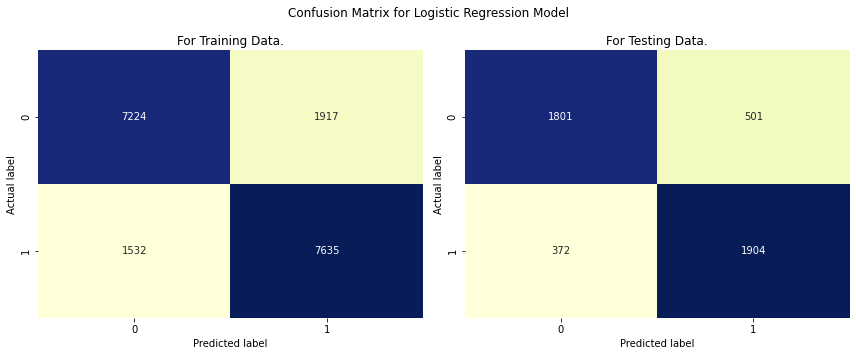

In [38]:
plt.figure(figsize = (12, 5))

# For training data.
plt.subplot(1,2,1)
create_confusion_matrix(y_train, y_train_pred)
plt.title('For Training Data.')

# For testing data.
plt.subplot(1,2,2)
create_confusion_matrix(y_test, y_test_pred)
plt.title('For Testing Data.')

plt.suptitle('Confusion Matrix for Logistic Regression Model')
plt.tight_layout()
plt.show()

### Other metrics.
- Accuracy.
- F1-measure.
- ROC-AUC Metric.

In [39]:
# Designing a general function to display the performance metrics for the classification task.
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def show_classification_metrics(Y_true, Y_pred):
    '''
    This function displays the accuracy score, f1 - score and the ROC_AUC score
    for given classification predictions and the true labels.
    '''

    print('Accuracy Score = ', round(accuracy_score(Y_true, Y_pred), 3))
    print('F1 - Score = ', round(f1_score(Y_true, Y_pred), 3))
    print('ROC - AUC Score = ', round(roc_auc_score(Y_true, Y_pred), 3))
    return

In [40]:
print('For Training Data')
print('--------------------')
show_classification_metrics(y_train, y_train_pred)

print()

print('For Testing Data')
print('--------------------')
show_classification_metrics(y_test, y_test_pred)

For Training Data
--------------------
Accuracy Score =  0.812
F1 - Score =  0.816
ROC - AUC Score =  0.812

For Testing Data
--------------------
Accuracy Score =  0.809
F1 - Score =  0.814
ROC - AUC Score =  0.809


In [41]:
log_reg.coef_.shape

(1, 38)

In [42]:
x_test.sample()

,age,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Without-pay,workclass_govt_employees,workclass_self_employed,education_Assoc-voc,education_Bachelors,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
4025,0.273973,0.0,0.0,0.397959,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


# Saving the model.

In [43]:
from joblib import dump
dump(log_reg, 'logistic_regression_model.pkl')

['logistic_regression_model.pkl']

In [79]:
from os import chdir
import joblib
chdir(r'C:\Users\Home\Documents\Python Scripts\Flask tutorial\Model')
model = joblib.load('logistic_regression_model.pkl')



In [80]:
df_input = pd.concat([df_numerical,df_categorical], axis = 1)
df_input

,age,capital-gain,capital-loss,hours-per-week,workclass_Private,workclass_Without-pay,workclass_govt_employees,workclass_self_employed,education_Assoc-voc,education_Bachelors,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Asian-Pac-Islander,race_Black,race_Other,race_White,gender_Male
0,23,1523,230,12,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
Y = model.predict(df_input)[0]
Y == 1

True

In [98]:
sorted(df['gender'].unique())

['Female', 'Male']

In [99]:
to_ignore = ('workclass_Never-worked', 'education_Assoc-acdm', 'marital-status_Married', 'occupation_Adm-clerical',
            'race_Amer-Indian-Eskimo', 'gender_Female')

'gender_Female' in to_ignore 

True

In [85]:
options = list(X.columns)
options

['age',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Private',
 'workclass_Without-pay',
 'workclass_govt_employees',
 'workclass_self_employed',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'education_elementary_school',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'gender_Male']

In [86]:
list(df_input.columns)

['age',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'workclass_Private',
 'workclass_Without-pay',
 'workclass_govt_employees',
 'workclass_self_employed',
 'education_Assoc-voc',
 'education_Bachelors',
 'education_Doctorate',
 'education_HS-grad',
 'education_Masters',
 'education_Preschool',
 'education_Prof-school',
 'education_Some-college',
 'education_elementary_school',
 'marital-status_Never-married',
 'marital-status_Separated',
 'marital-status_Widowed',
 'occupation_Armed-Forces',
 'occupation_Craft-repair',
 'occupation_Exec-managerial',
 'occupation_Farming-fishing',
 'occupation_Handlers-cleaners',
 'occupation_Machine-op-inspct',
 'occupation_Other-service',
 'occupation_Priv-house-serv',
 'occupation_Prof-specialty',
 'occupation_Protective-serv',
 'occupation_Sales',
 'occupation_Tech-support',
 'occupation_Transport-moving',
 'race_Asian-Pac-Islander',
 'race_Black',
 'race_Other',
 'race_White',
 'gender_Male']